## Simple ML model with basic text Processing

- divide data for blind validation
- check if target veriable is balance or not
- remove all junk
- use steming
- use count vectorizaton
- apply ml model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import time

In [2]:
data=pd.read_csv('Data/train.csv')
data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


## divide data for blind validation

In [3]:
from sklearn.model_selection import train_test_split
data,blind_data=train_test_split(data,test_size=0.3)

### Check target variable is balance or not

In [4]:
data['sentiment'].value_counts()

1    2973
2    1709
0     322
3      87
Name: sentiment, dtype: int64

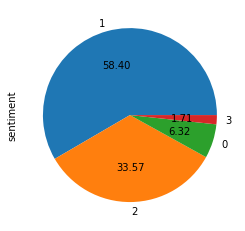

In [5]:
data['sentiment'].value_counts().plot(kind='pie',autopct='%2.2f')

## Remove Junk from text and apply stemming

In [6]:
import re

In [7]:
match_patt=r'#[0-9a-z_]+|@[0-9a-z]+|https://\w+[./\w]+|http://\w+[./\w]+|bit.ly[/\.\w]+|[^a-z]|[\d]+'
# hashtag '#[0-9a-z_]+'
# mention '@[0-9a-z]+'
# website 'https://\w+[./\w]+|http://\w+[./\w]+'
# short website 'bit.ly[/\.\w]+'
# punctuations '[^a-z]'
# numbers '[\d]+'
def find_pat(txt):
    return re.sub(match_patt,' ',txt,flags=re.I)

In [8]:
corpus=[]
pstem=nltk.stem.PorterStemmer()

In [9]:
for i in data['tweet']:
    text=find_pat(str(i)).lower()
    text=nltk.word_tokenize(text)
    text=[pstem.stem(i) for i in text if i not in nltk.corpus.stopwords.words('english') and len(i)>3]
    text=' '.join(text)
    corpus.append(text)

In [10]:
corpus

['appl store buy ipad guess geek drunk hahaha',
 'googl bodi share patient physician share data interact anatomi',
 'googl circl launch today killer link',
 'use googl chrome develop tool point javascript consol extens',
 'googl launch social network report claim googl might sxsw event link',
 'stop kill tree post busi card dead send card hashabl link',
 'hope year festiv crashi year iphon',
 'put head give iphon link',
 'googl advertis check thing link',
 'lent marc ecko appl remot',
 'appl trump nvidia tablet game link',
 'tech idol send highlight watch googl marissa mayer speak',
 'download android market head',
 'googl earth engin provid tech indigen tribe report status forest like',
 'news social import googl screw launch circu link',
 'quot appl come cool technolog ever heard confer quot',
 'jqtouch look amaz appl theme make page look like nativ iphon app',
 'race around best fuel great local fare link',
 'googl tip launch social network today call circl link',
 'appl set tempora

## use count vectorization

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cnt_vec=CountVectorizer(max_features=2709)

In [13]:
X=cnt_vec.fit_transform(corpus).toarray()

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
y=data['sentiment']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

## blind data process

In [17]:
blind_corpus=[]
for i in blind_data['tweet']:
    text=find_pat(str(i)).lower()
    text=nltk.word_tokenize(text)
    text=[pstem.stem(i) for i in text if i not in nltk.corpus.stopwords.words('english') and len(i)>3]
    text=' '.join(text)
    blind_corpus.append(text)

In [18]:
blind_X=cnt_vec.transform(blind_corpus).toarray()
blind_y=blind_data['sentiment']

## apply ML model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [20]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [21]:
lr=LogisticRegression()
rf=RandomForestClassifier()
svm_cls=SVC(kernel='linear')
ml_nb=MultinomialNB()

In [22]:
models={
    lr:'LogisticRegression',
    rf:'RandomForestClassifier',
    svm_cls:'SVC',
    ml_nb:'MultinomialNB'
}

In [23]:
res=[]
for i in models:
    temp={}
    temp['Model']=models[i]
    start_time=time.time()
    i.fit(X_train,y_train)
    temp['Computation Time']=time.time()-start_time
    y_pred=i.predict(X_test)
    y_blind=i.predict(blind_X)
    temp['f1_score']=f1_score(y_test,y_pred,average='weighted')
    temp['f1_score_blind']=f1_score(blind_y,y_blind,average='weighted')
    temp['accuracy_score']=accuracy_score(y_test,y_pred)
    temp['precision_score']=precision_score(y_test,y_pred,average='weighted')
    temp['recall_score']=recall_score(y_test,y_pred,average='weighted')
    res.append(temp)
pd.DataFrame(res)

/home/kalpesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Computation Time,f1_score,f1_score_blind,accuracy_score,precision_score,recall_score
0,LogisticRegression,2.325998,0.634959,0.640798,0.652487,0.626473,0.652487
1,RandomForestClassifier,10.373252,0.649822,0.638610,0.674084,0.655532,0.674084
2,SVC,68.585542,0.640557,0.632470,0.651178,0.634236,0.651178
3,MultinomialNB,0.167943,0.627930,0.623201,0.640707,0.618982,0.640707
